In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/student.csv')

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Id'}>],
       [<Axes: title={'center': 'Student_Age'}>,
        <Axes: title={'center': 'Weekly_Study_Hours'}>]], dtype=object)

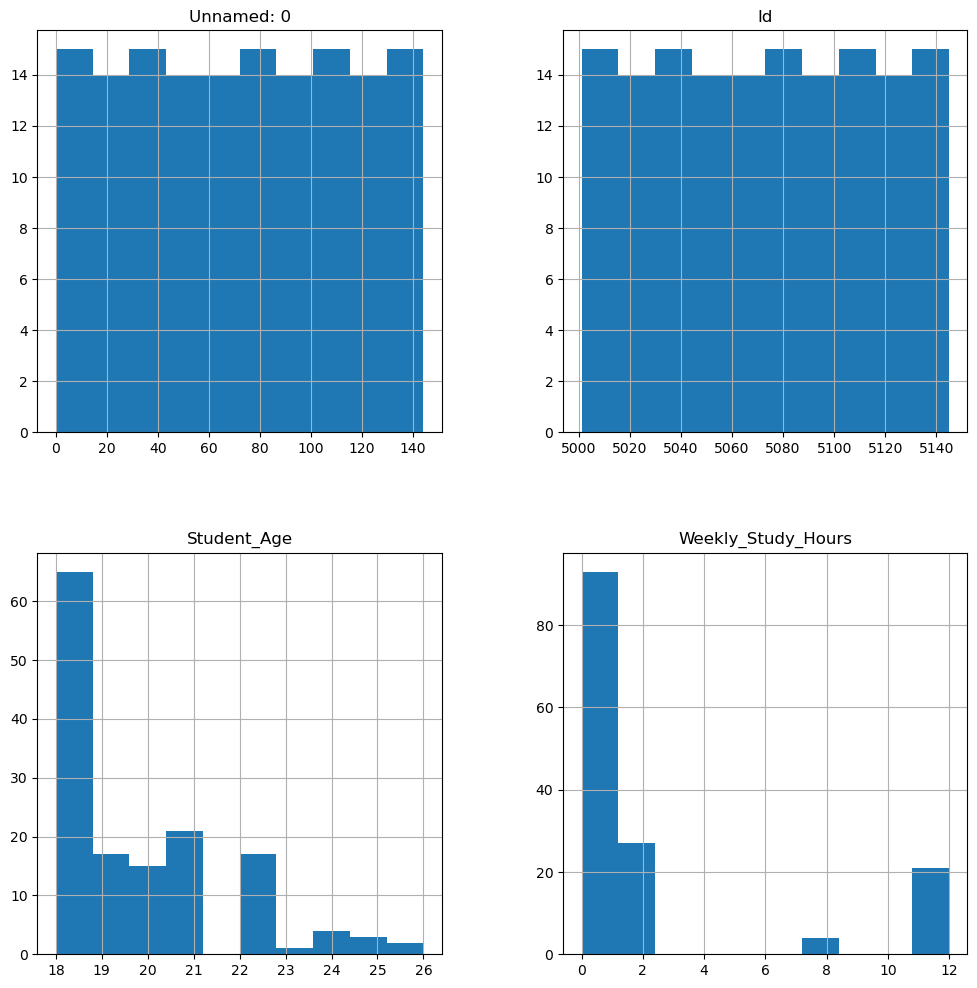

In [4]:
plt.rcParams['figure.figsize'] = [12, 12]
df.hist()

In [5]:
df.describe()

,Unnamed: 0,Id,Student_Age,Weekly_Study_Hours
count,145.000000,145.000000,145.000000,145.000000
mean,72.000000,5073.000000,19.682759,2.331034
std,42.001984,42.001984,1.992010,4.249273
min,0.000000,5001.000000,18.000000,0.000000
25%,36.000000,5037.000000,18.000000,0.000000
50%,72.000000,5073.000000,19.000000,0.000000
75%,108.000000,5109.000000,21.000000,2.000000
max,144.000000,5145.000000,26.000000,12.000000


In [6]:
df.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [4]:
df.dtypes

Unnamed: 0             int64
Id                     int64
Student_Age            int64
Sex                   object
High_School_Type      object
Scholarship           object
Additional_Work       object
Sports_activity       object
Transportation        object
Weekly_Study_Hours     int64
Attendance            object
Reading               object
Notes                 object
Listening_in_Class    object
Project_work          object
Grade                 object
dtype: object

In [5]:
print(df['High_School_Type'].unique())
print(df['Scholarship'].unique())
print(df['Additional_Work'].unique())
print(df['Sports_activity'].unique())
print(df['Transportation'].unique())
print(df['Attendance'].unique())
print(df['Reading'].unique())
print(df['Notes'].unique())
print(df['Listening_in_Class'].unique())
print(df['Project_work'].unique())
print(df['Grade'].unique())

['Other' 'State' 'Private']
['50%' '75%' '100%' '25%' nan]
['Yes' 'No']
['No' 'Yes']
['Private' 'Bus']
['Always' 'Never' 'Sometimes' '3']
['Yes' 'No']
['Yes' 'No' '6']
['No' 'Yes' '6']
['No' 'Yes']
['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


In [4]:
df = df.drop(columns=['Id'])

In [5]:
df['High_School_Type'] = df['High_School_Type'].map({'Other': 2, 'State': 1, 'Private': 0}).astype(float)
df['Scholarship'] = df['Scholarship'].map({'50%': 3,'75%': 2, '100%': 1, '25%': 0}).astype(float)
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0}).astype(float)
df['Sports_activity'] = df['Sports_activity'].map({'Yes': 1, 'No': 0}).astype(float)
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0}).astype(float)
df['Attendance'] = df['Attendance'].map({'Always': 3,'Never': 2, 'Sometimes': 1, '3': 0}).astype(float)
df['Reading'] = df['Reading'].map({'Yes': 1, 'No': 0}).astype(float)
df['Notes'] = df['Notes'].map({'Yes': 2, 'No': 1, '6': 0}).astype(float)
df['Listening_in_Class'] = df['Listening_in_Class'].map({'Yes': 2, 'No': 1, '6': 0}).astype(float)
df['Project_work'] = df['Project_work'].map({'Yes': 1, 'No': 0}).astype(float)
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0}).astype(float)

In [6]:
df.head()

,Unnamed: 0,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,21,1.0,2.0,3.0,1.0,0.0,1.0,0,3.0,1.0,2.0,1.0,0.0,AA
1,1,20,1.0,2.0,3.0,1.0,0.0,1.0,0,3.0,1.0,1.0,2.0,1.0,AA
2,2,21,1.0,1.0,3.0,0.0,0.0,1.0,2,2.0,0.0,1.0,1.0,1.0,AA
3,3,18,0.0,0.0,3.0,1.0,0.0,0.0,2,3.0,0.0,2.0,1.0,0.0,AA
4,4,22,1.0,0.0,3.0,0.0,0.0,0.0,12,3.0,1.0,1.0,2.0,1.0,AA


In [7]:
df.isna().sum()

Unnamed: 0            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [6]:
# df['Grade'] = df['Grade'].map({'AA': 0,'BA': 1,'CC': 2,'Fail': 3,'BB': 4,'CB': 5,'DD': 6,'DC': 7}).astype(int)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])

In [8]:
df.isna().sum()

Unnamed: 0            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [7]:
median_minpay = df['Scholarship'].median()
df['Scholarship'] = df['Scholarship'].fillna(median_minpay)

In [10]:
df.isna().sum()

Unnamed: 0            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

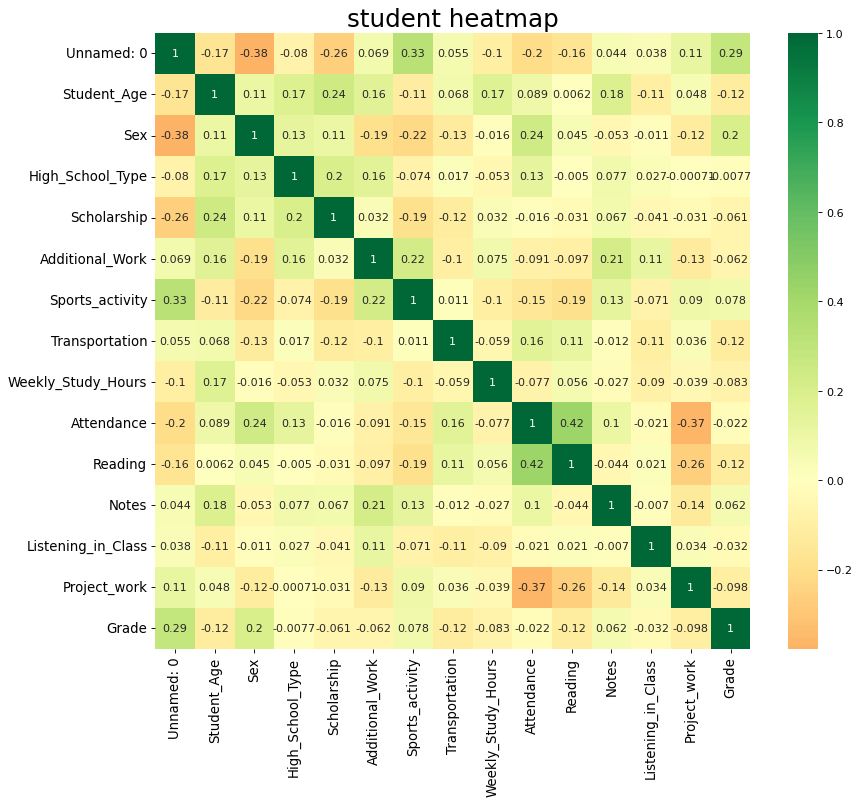

In [12]:
heatdf = df
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(heatdf.corr(), xticklabels = heatdf.corr().columns, yticklabels = heatdf.corr().columns, cmap = 'RdYlGn', center = 0, annot = True)
plt.title('student heatmap', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Grade_category'] = pd.cut(df['Grade'], bins = [-1, 1, 3, 5, 7], labels = ['Неудовлетворительно', 'Удовлетворительно', 'Хорошист', 'Отличник'])
df['Grade_category'] = label_encoder.fit_transform(df['Grade_category'])

X = df.drop(['Grade', 'Grade_category'], axis = 1)
y = df['Grade_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


In [12]:
df.dtypes

Unnamed: 0              int64
Student_Age             int64
Sex                   float64
High_School_Type      float64
Scholarship           float64
Additional_Work       float64
Sports_activity       float64
Transportation        float64
Weekly_Study_Hours      int64
Attendance            float64
Reading               float64
Notes                 float64
Listening_in_Class    float64
Project_work          float64
Grade                   int64
Grade_category          int64
dtype: object

In [29]:
model = keras.Sequential([
    keras.Input(shape=(14,)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100, validation_split = 0.2, verbose = 0) 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(f"\nТестовая точность: {test_acc:.4f}")

y_pred_proba = model.predict(X_test)  #Вероятности классов
y_pred = y_pred_proba.argmax(axis = 1) #Выбор класса с max вероятностью

print(f"F1-score (macro): {f1_score(y_test, y_pred, average = 'macro'):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")




Тестовая точность: 0.4138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
F1-score (macro): 0.2500
Accuracy: 0.4138


In [36]:
import random
#пространство гиперпараметров
param_space = [
    (128, 64, 0.3, 0.001, 32),#layer_1, layer_2, dropout, learning_rate, batch_size
    (256, 128, 0.4, 0.0005, 32),
    (64, 32, 0.2, 0.001, 64),
    (128, 32, 0.5, 0.0001, 16),
    (256, 64, 0.3, 0.0005, 32),
    (64, 64, 0.4, 0.001, 32),]

best_score = 0
best_model = None
best_params = None

for layer_1, layer_2, dropout, learning_rate, batch_size in param_space:
    print(f"\n{layer_1}/{layer_2}, dropout = {dropout_rate}, learning_rate = {learning_rate}")
    
    model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(layer_1, activation = 'relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(layer_2, activation = 'relu'),
        keras.layers.Dense(len(np.unique(y_train)), activation = 'softmax')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate)
    model.compile(optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    model_history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = batch_size, verbose=0)
    val_acc = max(model_history.history['val_accuracy'])
    
    if val_acc > best_score:
        best_score = val_acc
        best_model = model
        best_params = (layer_1, layer_2, dropout_rate, learning_rate, batch_size)
    print(f"Val Acc: {val_acc:.4f}")

print(f"\nлучшая модель: val_acc = {best_score:.4f}")
print(f"параметры: {best_params[0]}/{best_params[1]},"f"dropout = {best_params[2]}, learning_rate = {best_params[3]}, batch_size = {best_params[4]}")


128/64, dropout = 0.4, learning_rate = 0.001
Val Acc: 0.6667

256/128, dropout = 0.4, learning_rate = 0.0005
Val Acc: 0.5417

64/32, dropout = 0.4, learning_rate = 0.001
Val Acc: 0.5000

128/32, dropout = 0.4, learning_rate = 0.0001
Val Acc: 0.4583

256/64, dropout = 0.4, learning_rate = 0.0005
Val Acc: 0.5417

64/64, dropout = 0.4, learning_rate = 0.001
Val Acc: 0.4583

лучшая модель: val_acc = 0.6667
параметры: 128/64,dropout = 0.4, learning_rate = 0.001, batch_size = 32


In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000, random_state = 42, multi_class = 'ovr', solver = 'liblinear')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred, average = 'weighted'):.4f}")

Accuracy:  0.2759
F1-Score:  0.2414


In [16]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel = 'rbf', C = 1.0, random_state = 42, probability = True)
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)
y_pred_proba_svc_rbf = svc_rbf.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_rbf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc_rbf, average = 'weighted', zero_division = 0):.4f}")

Accuracy: 0.4138
F1-Score: 0.2684


In [57]:
!pip install optuna -q

In [38]:
!pip install "neptune[optuna]" scikit-learn optuna numpy -q

In [19]:
import neptune
import optuna
from neptune.integrations.optuna import NeptuneCallback
optuna.logging.set_verbosity(optuna.logging.ERROR)

run = neptune.init_run(
    project = '-----0-0/studentneptune',  
    api_token = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyNGZkNzc2Ny03MGU3LTQzYTYtODhjYS04NDNhMjRhNWI5MTMifQ=="
    )

neptune_callback = NeptuneCallback(run)

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly'])
    C = trial.suggest_float('C', 0.01, 100.0, log = True)
    gamma = trial.suggest_float('gamma', 1e-5, 10.0, log = True)
    
    model = SVC(kernel = kernel, C = C, gamma = gamma, random_state = 42, probability = True)
    
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy', n_jobs = -1)
    return np.mean(scores)

study = optuna.create_study(study_name = 'svm_optuna', direction = 'maximize', sampler = optuna.samplers.TPESampler(seed = 42))

study.optimize(objective, n_trials = 50, callbacks = [neptune_callback], show_progress_bar = True)

print(f"лучшие параметры: {study.best_params}")
print(f"лучшая CV accuracy: {study.best_value:.4f}")

model = SVC(**study.best_params, random_state = 42, probability = True)
model.fit(X_train, y_train)
y_pred_svc_rbf = model.predict(X_test)
y_pred_proba_svc_rbf = model.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_rbf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc_rbf, average='weighted', zero_division=0):.4f}")

run.stop()

[neptune] [warning] Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: ReadTimeout
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/-----0-0/studentneptune/e/STUD-4


  0%|          | 0/50 [00:00<?, ?it/s]

[neptune] [info   ] Communication with Neptune restored!
лучшие параметры: {'kernel': 'rbf', 'C': 29.76718995329533, 'gamma': 0.00189967500540982}
лучшая CV accuracy: 0.5696
Accuracy: 0.5172
F1-Score: 0.5021
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 907 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] Still waiting for the remaining 907 operations (0.00% done). Please wait.
[neptune] [info   ] All 907 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/-----0-0/studentneptune/e/STUD-4/metadata


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state = 42, max_depth = 3, min_samples_leaf = 20)
scoring = { 'Accuracy': 'accuracy_score', 'F1-Score': 'f1_score'}

param_grid = {
    'max_depth': [3, 5, 7, 10, None],  
    'min_samples_split': [5, 10, 15, 20],  
    'min_samples_leaf': [5, 10, 15, 20],  
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt'] 
}

grid_search = GridSearchCV(estimator = tree_model, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = 1)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
grid_search_predict = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, grid_search_predict):.4f}")
print(f"F1-Score: {f1_score(y_test, grid_search_predict, average='macro'):.4f}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Accuracy: 0.5517
F1-Score: 0.4166


In [53]:
print("Лучшее значение кросс-валидационной оценки:", grid_search.best_score_)#переобучение

Лучшее значение кросс-валидационной оценки: 0.5260869565217391
